In [ ]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path


/Users/tqh7876/Library/CloudStorage/OneDrive-Takeda/ActiveProjects/WearableSimulations/code/quantitative-sciences-nt1-detection-wearable-simulation


In [ ]:
df = pd.read_csv('path/to/spreadsheet.csv')

cols = ['name', 'Recordings (n)', 'Min. required positive (n)', 'Prevalence']
for col in cols: 
    print(f"{col}: {df[col].unique()}\n")

print(f"\n{'='*84}\n")
df.info()

name: ['Multi-feature - 2 nights' 'Multi-feature - 1 night (Colapsed)'
 'Multi-feature - 1 night' 'SOREMP - 2 nights'
 'SOREMP - 1 night (Colapsed)' 'SOREMP - 1 night'
 'Multi-feature - phenotypes' 'MSLT - 2 night']

Recordings (n): [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]

Min. required positive (n): [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]

Prevalence: ['1:2' '1:8' '1:32' '1:128' '1:512' '1:2048']



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60480 entries, 0 to 60479
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Recordings (n)              60480 non-null  int64  
 1   Min. required positive (n)  60480 non-null  int64  
 2   Prevalence                  60480 non-null  object 
 3   min PPV                     60480 non-null  float64
 4   min Re                      60480 non-null  float64
 5   Sensitivity                 60480 non-null  float64
 6   Specificity       

# Single night of performance

/var/folders/m_/cv6d9d7j7jbglrv6xhynzvrh0000gr/T/ipykernel_16444/1212674722.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0, ha='center')


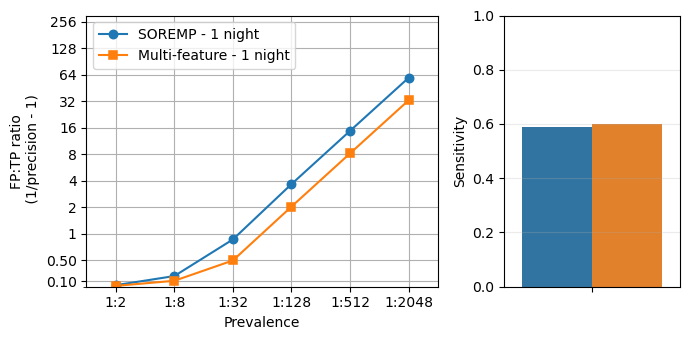

In [ ]:
names = [
    #'Multi-feature - 2 nights',
    #'Multi-feature - 1 night (Colapsed)',
    
    #'SOREMP - 2 nights',
    #'SOREMP - 1 night (Colapsed)',
    'SOREMP - 1 night',
    'Multi-feature - 1 night',
    #'Multi-feature - phenotypes',
    #'MSLT - 2 night'
]

min_req_nights = 1 # TODO - select optimal req nights! Not just 3!
recordings = 1
min_PPV = 2/3
min_Re = 1/2    # [1/5, 1/4, 1/3, 1/2]

# select data
df_results_ = df[
    df['name'].isin(names) & 
    (df['Recordings (n)'] == recordings) & 
    (df['Min. required positive (n)'] == min_req_nights) & 
    (df['min PPV'] == min_PPV) &
    (df['min Re'] == min_Re)
]


# parameters
epsilon = 1e-5

# plot
fig, ax = plt.subplots(ncols=2, figsize=(7, 3.5), gridspec_kw={'width_ratios': [2, 1]})
sns.pointplot(
    df_results_,
    x='Prevalence', 
    y='FP:TP', 
    hue='name', hue_order=names,
    markers=['o', 's', 'v', 'd', 'x'], ms=6,
    lw=1.5,
    ax=ax[0]
)

# Configurations
ax[0].set_ylabel('FP:TP ratio\n (1/precision - 1)')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0, ha='center')

# Set y-axis to log scale
#ax.set_yscale('symlog', base=2, linthresh=1e-2)  # Log scale with linear threshold near zero
ax[0].set_yscale('symlog', base=2, linthresh=1)  # Log scale with linear threshold near zero
ax[0].set_ylim([0, 300])

# Customize y-tick labels to actual values
ticks = [epsilon, 0.1, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256]
ticks = [0.1, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256]
ax[0].set_yticks(ticks)
ax[0].set_yticklabels([f'{tick:.2f}' if tick < 1 else f'{tick}' for tick in ticks])  # Format values for readability

# final
ax[0].grid()
ax[0].legend(title='', loc='upper left')

ax[1].grid(alpha=0.25)

sns.barplot(df_results_, hue='name', hue_order=names, y='Sensitivity', ax=ax[1])
ax[1].set_ylim(0, 1)
# ax[1].legend(title='')
ax[1].legend().remove()

plt.tight_layout()


# Find best threshold

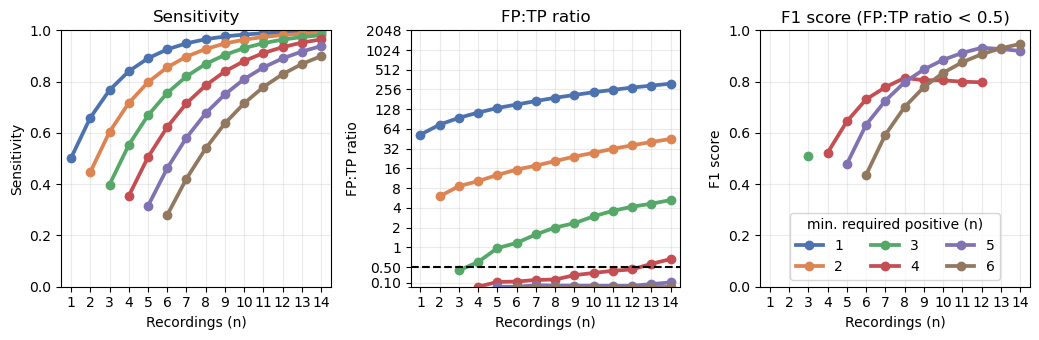

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# select data
title = 'Wearable simulated\n994-0001, 994-1501, 861-2001'
title = 'Wearable - Stanford test - 1 night'
name = 'SOREMP - 2 nights'
# name = 'Multi-feature - phenotypes'
# name = 'Multi-feature - 2 nights'
name = 'Multi-feature - 2 nights'
min_req_nights = 6
min_PPV = 2/3   # [2/3, 1/2, 1/3] # Corresponds to: FP:DP = [0.5, 1, 2] # FP:TP ratio
min_Re = 1/5    # [1/5, 1/4, 1/3, 1/2]

# 
max_FPTP = (1 / min_PPV) - 1
min_F1 = 2 * (min_PPV * min_Re) / (min_PPV + min_Re)

prevalence = '1:2048'
df_ = df[
    (df['Min. required positive (n)'] <= min_req_nights) & 
    (df['name'] == name) & 
    (df['Prevalence'] == prevalence) & 
    (df['min PPV'] == min_PPV) &
    (df['min Re'] == min_Re)
]

# parameters
hue = 'Min. required positive (n)'
x = 'Recordings (n)'

# plot
fig, axes = plt.subplots(ncols=3, figsize=(10.5, 3.5))

# Sensitivity plot
sns.pointplot(df_, hue=hue, y='Sensitivity', x=x, palette='deep', ax=axes[0], ms=5)
# axes[0].axhline(y=min_Re, color='black', linestyle='--', label='0.5 threshold')
axes[0].set_title('Sensitivity')
#axes[0].set_xlabel('Number of Days')
axes[0].set_ylabel('Sensitivity')
axes[0].grid(True, alpha=0.25)
axes[0].set_ylim([0, 1])
axes[0].legend().remove()

# FP:TP Ratio plot
sns.pointplot(df_, hue=hue, y='FP:TP', x=x, palette='deep', ax=axes[1], ms=5)
axes[1].set_title('FP:TP ratio')
#axes[2].set_xlabel('Number of Days')
axes[1].set_ylabel('FP:TP ratio')
axes[1].grid(True, alpha=0.25)
#axes[2].legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left', ncols=)
axes[1].legend().remove()
axes[1].axhline(y=max_FPTP, color='black', linestyle='--', label='0.5 threshold')

# Customize y-tick labels to actual values
# ticks = [epsilon, 0.1, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256]
ticks = [0.1, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
axes[1].set_yscale('symlog', base=2, linthresh=1)  # Log scale with linear threshold near zero
axes[1].set_ylim([0, 2e3])
axes[1].set_yticks(ticks)
axes[1].set_yticklabels([f'{tick:.2f}' if tick < 1 else f'{tick}' for tick in ticks])  # Format values for readability

# F1 
sns.pointplot(df_, hue=hue, y='F1 score (min. PPV)', x=x, palette='deep', ax=axes[2], ms=5)
# sns.pointplot(df_, hue=hue, y='Recall_at_minPPV', x=x, palette='deep', ax=axes[2], ms=5)
# sns.pointplot(df_, hue=hue, y='F1 score', x=x, palette='deep', ax=axes[2], ms=5)
axes[2].set_title(f'F1 score (FP:TP ratio < {max_FPTP})')
#axes[1].set_xlabel('Number of Days')
axes[2].set_ylabel('F1 score')
axes[2].grid(True, alpha=0.25)
axes[2].legend().remove()
axes[2].set_ylim([0, 1])
# axes[2].axhline(y=min_F1, color='black', linestyle='--', label='0.5 threshold')
#axes[1].legend(title=hue, bbox_to_anchor=(0.5, -0.2), loc='center', ncols=min_req_nights)

# legend handled at the end: 
axes[2].legend(title='min. required positive (n)', loc='lower center', ncols=3)

plt.tight_layout()


/var/folders/m_/cv6d9d7j7jbglrv6xhynzvrh0000gr/T/ipykernel_17797/3184305054.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results_['name'] = df_results_['name'].replace(rename)
/var/folders/m_/cv6d9d7j7jbglrv6xhynzvrh0000gr/T/ipykernel_17797/3184305054.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0, ha='center')


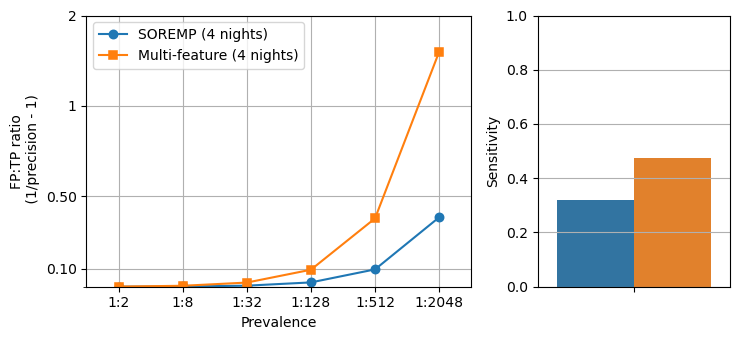

In [ ]:
names = [
    'Multi-feature - 2 nights',
    #'Multi-feature - 1 night (Colapsed)',
    
    'SOREMP - 2 nights',
    #'SOREMP - 1 night (Colapsed)',
    #'SOREMP - 1 night',
    #'Multi-feature - 1 night',
    #'Multi-feature',
    #'MSLT - 2 night'
]

min_req_nights = 3 # TODO - select optimal req nights! Not just 3!
recordings = 4
min_PPV = 2/3
min_Re = 1/5    # [1/5, 1/4, 1/3, 1/2]

# select data
df_results_ = df[
    df['name'].isin(names) & 
    (df['Recordings (n)'] == recordings) & 
    (df['Min. required positive (n)'] == min_req_nights) & 
    (df['min PPV'] == min_PPV) &
    (df['min Re'] == min_Re)
]

# Replace names
new_names = [f'SOREMP ({recordings} nights)', f'Multi-feature ({recordings} nights)']
rename = {
    'Multi-feature - 2 nights': f'Multi-feature ({recordings} nights)',
    'SOREMP - 2 nights': f'SOREMP ({recordings} nights)'
}
df_results_['name'] = df_results_['name'].replace(rename)

# parameters
epsilon = 1e-5

# plot
fig, ax = plt.subplots(ncols=2, figsize=(7.5, 3.5), gridspec_kw={'width_ratios': [2, 1]})

sns.pointplot(
    df_results_,
    x='Prevalence', 
    y='FP:TP', 
    hue='name', hue_order=new_names,
    markers=['o', 's', 'v', 'd', 'x'], ms=6,
    lw=1.5,
    ax=ax[0]
)

# Configurations
ax[0].set_ylabel('FP:TP ratio\n (1/precision - 1)')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0, ha='center')

# Set y-axis to log scale
#ax.set_yscale('symlog', base=2, linthresh=1e-2)  # Log scale with linear threshold near zero
ax[0].set_yscale('symlog', base=2, linthresh=1)  # Log scale with linear threshold near zero


# Customize y-tick labels to actual values
ticks = [epsilon, 0.1, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256]
ticks = [0.1, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256]
ax[0].set_yticks(ticks)
ax[0].set_yticklabels([f'{tick:.2f}' if tick < 1 else f'{tick}' for tick in ticks])  # Format values for readability
ax[0].set_ylim([0, 2])

# final
ax[0].grid()
ax[0].legend(title='', loc='upper left')

ax[1].grid()

sns.barplot(df_results_, hue='name', hue_order=new_names, y='Sensitivity', ax=ax[1])
ax[1].set_ylim(0, 1)
ax[1].legend().remove()

# 
# ax[2].grid(alpha=0.25)

# sns.barplot(df_results_, hue='name', hue_order=new_names, y='F1 score', ax=ax[2])
# ax[2].set_ylim(0, 1)
# ax[2].legend().remove()

plt.tight_layout()

# Phenotypes

/var/folders/m_/cv6d9d7j7jbglrv6xhynzvrh0000gr/T/ipykernel_97953/3734312078.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')


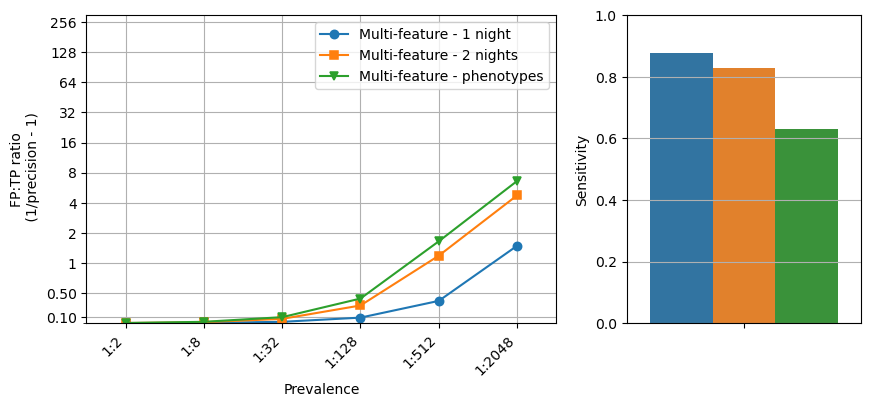

In [ ]:

# select data
names = [
    'Multi-feature - 1 night', 
    'Multi-feature - 2 nights',
    #'SOREMP - 2 nights', 
    #'SOREMP - 1 night', 
    #'PSG-based - 1 night - Stanford test',
    #'Multi-feature - 1 night - Stanford test', 
    'Multi-feature - phenotypes'
]

hue_order = names


min_req_nights = 3 # TODO - select optimal req nights! Not just 3!
recordings = 7
min_PPV = 1/2
df_results_ = df[df['name'].isin(names) & (df['Recordings (n)'] == recordings) & (df['Min. required positive (n)'] == min_req_nights) & (df['min PPV'] == min_PPV)]
# df_results_ = df_selected[df_selected['name'].isin(names) & (df_selected['Recordings (n)'] == recordings) & (df_selected['Min. required positive (n)'] == min_req_nights) & (df_selected['min PPV'] == min_PPV)]

# parameters
epsilon = 1e-5

# plot
fig, ax = plt.subplots(ncols=2, figsize=(10, 4), gridspec_kw={'width_ratios': [2, 1]})
sns.pointplot(
    df_results_,
    x='Prevalence', 
    y='FP:TP', 
    hue='name', hue_order=hue_order,
    markers=['o', 's', 'v', 'd', 'x'], ms=6,
    lw=1.5,
    ax=ax[0]
)

# Configurations
ax[0].set_ylabel('FP:TP ratio\n (1/precision - 1)')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0, ha='center')

# Set y-axis to log scale
#ax.set_yscale('symlog', base=2, linthresh=1e-2)  # Log scale with linear threshold near zero
ax[0].set_yscale('symlog', base=2, linthresh=1)  # Log scale with linear threshold near zero
ax[0].set_ylim([0, 300])

# Customize y-tick labels to actual values
ticks = [epsilon, 0.1, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256]
ticks = [0.1, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256]
ax[0].set_yticks(ticks)
ax[0].set_yticklabels([f'{tick:.2f}' if tick < 1 else f'{tick}' for tick in ticks])  # Format values for readability

# final
# final
ax[0].grid()
ax[0].legend(title='', loc='upper left')

ax[1].grid(alpha=0.25)

sns.barplot(df_results_, hue='name', y='Sensitivity', ax=ax[1])
ax[1].set_ylim(0, 1)
ax[1].legend().remove()

plt.tight_layout()


# Select min. Req nights

In [89]:
# Format dataframe for plotting

#prevalences = ['1:128', '1:512', '1:2048']
#min_precisions = [4/5, 1/2, 1/3]
prevalences = ['1:2', '1:8', '1:32', '1:128', '1:512', '1:2048']
min_precision = 2/3
max_FPTP = (1 / min_PPV) - 1
nights = 14

names = [
    'Multi-feature - 2 nights',
    'Multi-feature - 1 night (Colapsed)',
    'SOREMP - 2 nights',
    'SOREMP - 1 night (Colapsed)',
    'SOREMP - 1 night',
    'Multi-feature - 1 night',
    'Multi-feature - phenotypes',
    'MSLT - 2 night'
]

df_out = []
for prevalence in prevalences: 
    for name in names:
        for night in range(nights):
            
            # select data:
            df_ = df[
                (df['name'] == name) & 
                (df['Recordings (n)'] == (night + 1)) & 
                (df['Prevalence'] == prevalence) &
                (df['min PPV'] == min_precision)
            ]
            
            # select max 'f1 score (min. PPV)'
            df_sorted = df_.sort_values(by='F1 score (min. PPV)', ascending=False).head(1)
            df_dict = df_sorted.iloc[0].to_dict()
            # if df_dict['F1 score (min. PPV)'] > 0:
            df_out.append(df_dict)
                
df_selected = pd.DataFrame(df_out)

cols = ['name', 'Recordings (n)', 'Min. required positive (n)', 'Prevalence', 'min PPV']
for col in cols: 
    print(f"{col}: {df_selected[col].unique()}\n")
print(df_selected.shape)
df_selected.head(10)

name: ['Multi-feature - 2 nights' 'Multi-feature - 1 night (Colapsed)'
 'SOREMP - 2 nights' 'SOREMP - 1 night (Colapsed)' 'SOREMP - 1 night'
 'Multi-feature - 1 night' 'Multi-feature - phenotypes' 'MSLT - 2 night']

Recordings (n): [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]

Min. required positive (n): [ 1  2  3  4  5  6  7  8  9 10 11 12]

Prevalence: ['1:2' '1:8' '1:32' '1:128' '1:512' '1:2048']

min PPV: [0.66666667]

(672, 24)


,Recordings (n),Min. required positive (n),Prevalence,min PPV,min Re,Sensitivity,Specificity,PPV,FP:TP,F1 score,...,FN,TP,name,approach,dependence,nights,Dxs,data_source,datasets,datasets_ext
0,1,1,1:2,0.666667,0.2,0.47185,0.98648,0.972145,0.028653,0.635330,...,52815.0,47185.0,Multi-feature - 2 nights,Multi-feature,dependent,2,"['NT1', 'Con']",nPSG - hypnogram,"NT1: Clinical Trials combined (n=54), Con: Sta...","['994-0001', '861-2001', 'Stanford - all']"
1,2,1,1:2,0.666667,0.2,0.64046,0.97387,0.960800,0.040799,0.768587,...,35954.0,64046.0,Multi-feature - 2 nights,Multi-feature,dependent,2,"['NT1', 'Con']",nPSG - hypnogram,"NT1: Clinical Trials combined (n=54), Con: Sta...","['994-0001', '861-2001', 'Stanford - all']"
2,3,1,1:2,0.666667,0.2,0.75627,0.96182,0.951942,0.050485,0.842899,...,24373.0,75627.0,Multi-feature - 2 nights,Multi-feature,dependent,2,"['NT1', 'Con']",nPSG - hypnogram,"NT1: Clinical Trials combined (n=54), Con: Sta...","['994-0001', '861-2001', 'Stanford - all']"
3,4,1,1:2,0.666667,0.2,0.83447,0.94920,0.942616,0.060877,0.885253,...,16553.0,83447.0,Multi-feature - 2 nights,Multi-feature,dependent,2,"['NT1', 'Con']",nPSG - hypnogram,"NT1: Clinical Trials combined (n=54), Con: Sta...","['994-0001', '861-2001', 'Stanford - all']"
4,5,1,1:2,0.666667,0.2,0.88656,0.93755,0.934195,0.070441,0.909754,...,11344.0,88656.0,Multi-feature - 2 nights,Multi-feature,dependent,2,"['NT1', 'Con']",nPSG - hypnogram,"NT1: Clinical Trials combined (n=54), Con: Sta...","['994-0001', '861-2001', 'Stanford - all']"
5,6,1,1:2,0.666667,0.2,0.92323,0.92608,0.925869,0.080067,0.924547,...,7677.0,92323.0,Multi-feature - 2 nights,Multi-feature,dependent,2,"['NT1', 'Con']",nPSG - hypnogram,"NT1: Clinical Trials combined (n=54), Con: Sta...","['994-0001', '861-2001', 'Stanford - all']"
6,7,1,1:2,0.666667,0.2,0.94700,0.91447,0.917165,0.090317,0.931844,...,5300.0,94700.0,Multi-feature - 2 nights,Multi-feature,dependent,2,"['NT1', 'Con']",nPSG - hypnogram,"NT1: Clinical Trials combined (n=54), Con: Sta...","['994-0001', '861-2001', 'Stanford - all']"
7,8,2,1:2,0.666667,0.2,0.91204,0.98982,0.988961,0.011162,0.948944,...,8796.0,91204.0,Multi-feature - 2 nights,Multi-feature,dependent,2,"['NT1', 'Con']",nPSG - hypnogram,"NT1: Clinical Trials combined (n=54), Con: Sta...","['994-0001', '861-2001', 'Stanford - all']"
8,9,2,1:2,0.666667,0.2,0.93686,0.98798,0.987332,0.012830,0.961434,...,6314.0,93686.0,Multi-feature - 2 nights,Multi-feature,dependent,2,"['NT1', 'Con']",nPSG - hypnogram,"NT1: Clinical Trials combined (n=54), Con: Sta...","['994-0001', '861-2001', 'Stanford - all']"
9,10,2,1:2,0.666667,0.2,0.95461,0.98589,0.985434,0.014781,0.969777,...,4539.0,95461.0,Multi-feature - 2 nights,Multi-feature,dependent,2,"['NT1', 'Con']",nPSG - hypnogram,"NT1: Clinical Trials combined (n=54), Con: Sta...","['994-0001', '861-2001', 'Stanford - all']"


/var/folders/m_/cv6d9d7j7jbglrv6xhynzvrh0000gr/T/ipykernel_17797/3859279958.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0, ha='center')


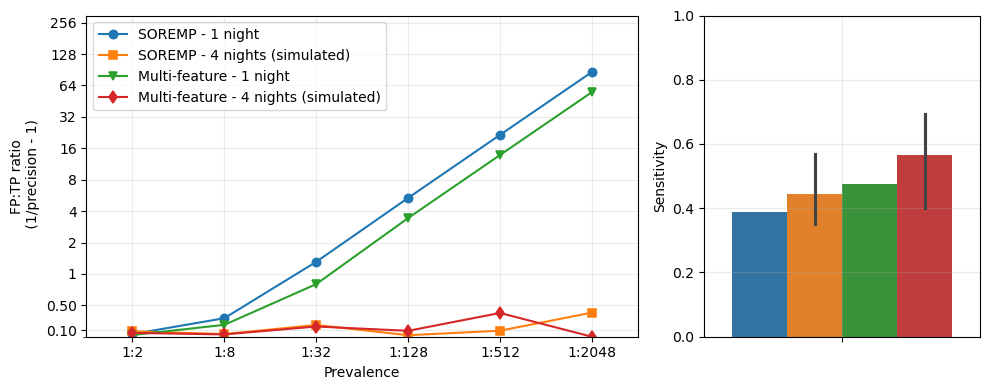

In [ ]:
# select data
names = [
    'Multi-feature - 2 nights',
    'Multi-feature - 1 night (Colapsed)',
    
    'SOREMP - 2 nights',
    'SOREMP - 1 night (Colapsed)',
    #'SOREMP - 1 night',
    #'Multi-feature - 1 night',
    #'Multi-feature - phenotypes',
    #'MSLT - 2 night'
]

new_names = [
    'SOREMP - 1 night',
    'SOREMP - 4 nights (simulated)',
    'Multi-feature - 1 night',
    'Multi-feature - 4 nights (simulated)'
]

df_soremp_1 = df_selected.query("(name == 'SOREMP - 1 night (Colapsed)') & (`Recordings (n)` == 1)").copy()
df_soremp_1['new_name'] = 'SOREMP - 1 night'
df_soremp_2 = df_selected.query("(name == 'SOREMP - 2 nights') & (`Recordings (n)` == 4)").copy()
df_soremp_2['new_name'] = 'SOREMP - 4 nights (simulated)'
df_multi_1 = df_selected.query("(name == 'Multi-feature - 1 night (Colapsed)') & (`Recordings (n)` == 1)").copy()
df_multi_1['new_name'] = 'Multi-feature - 1 night'
df_multi_2 = df_selected.query("(name == 'Multi-feature - 2 nights') & (`Recordings (n)` == 4)").copy()
df_multi_2['new_name'] = 'Multi-feature - 4 nights (simulated)'

# Combine dataframes
df_results_ = pd.concat([df_soremp_1, df_soremp_2, df_multi_1, df_multi_2], ignore_index=True)
# df_results_['new_name'] = new_names


# plot
# ==========================================================
fig, ax = plt.subplots(ncols=2, figsize=(10, 4), gridspec_kw={'width_ratios': [2, 1]})
sns.pointplot(
    df_results_,
    x='Prevalence', 
    y='FP:TP', 
    hue='new_name', hue_order=new_names,
    markers=['o', 's', 'v', 'd', 'x'], ms=6,
    lw=1.5,
    ax=ax[0]
)

# Configurations
ax[0].set_ylabel('FP:TP ratio\n (1/precision - 1)')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0, ha='center')

# Set y-axis to log scale
#ax.set_yscale('symlog', base=2, linthresh=1e-2)  # Log scale with linear threshold near zero
ax[0].set_yscale('symlog', base=2, linthresh=1)  # Log scale with linear threshold near zero
ax[0].set_ylim([0, 300])

# Customize y-tick labels to actual values
ticks = [1e-5, 0.1, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256]
ticks = [0.1, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256]
ax[0].set_yticks(ticks)
ax[0].set_yticklabels([f'{tick:.2f}' if tick < 1 else f'{tick}' for tick in ticks])  # Format values for readability

# final
ax[0].grid(alpha=0.25)
ax[0].legend(title='', loc='upper left')


sns.barplot(df_results_, hue='new_name', y='Sensitivity', ax=ax[1])
ax[1].set_ylim(0, 1)
ax[1].legend().remove()
ax[1].grid(alpha=0.25)


plt.tight_layout()



/var/folders/m_/cv6d9d7j7jbglrv6xhynzvrh0000gr/T/ipykernel_17797/2463873666.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0, ha='center', fontsize=9)
/var/folders/m_/cv6d9d7j7jbglrv6xhynzvrh0000gr/T/ipykernel_17797/2463873666.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0, ha='center', fontsize=9)
/var/folders/m_/cv6d9d7j7jbglrv6xhynzvrh0000gr/T/ipykernel_17797/2463873666.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=0, ha='center', fontsize=9)


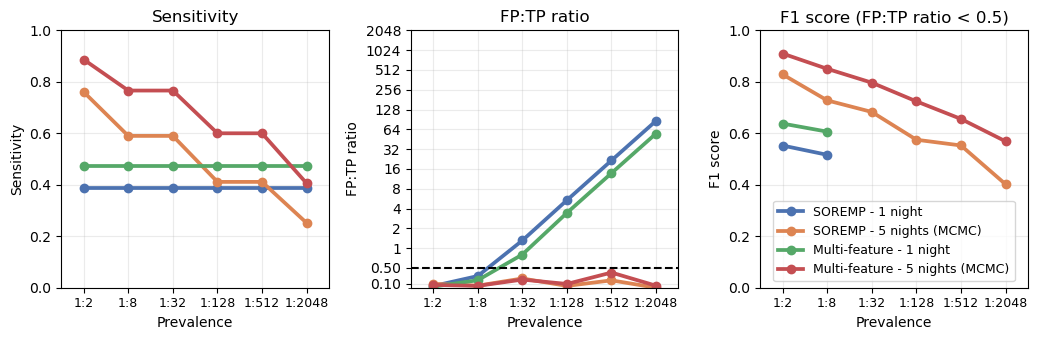

In [ ]:
# select data
names = [
    'Multi-feature - 2 nights',
    'Multi-feature - 1 night (Colapsed)',
    
    'SOREMP - 2 nights',
    'SOREMP - 1 night (Colapsed)',
    #'SOREMP - 1 night',
    #'Multi-feature - 1 night',
    #'Multi-feature - phenotypes',
    #'MSLT - 2 night'
]

new_names = [
    'SOREMP - 1 night',
    'SOREMP - 5 nights (MCMC)',
    'Multi-feature - 1 night',
    'Multi-feature - 5 nights (MCMC)'
]

df_soremp_1 = df_selected.query("(name == 'SOREMP - 1 night (Colapsed)') & (`Recordings (n)` == 1)").copy()
df_soremp_1['new_name'] = 'SOREMP - 1 night'
df_soremp_2 = df_selected.query("(name == 'SOREMP - 2 nights') & (`Recordings (n)` == 5)").copy()
df_soremp_2['new_name'] = 'SOREMP - 5 nights (MCMC)'
df_multi_1 = df_selected.query("(name == 'Multi-feature - 1 night (Colapsed)') & (`Recordings (n)` == 1)").copy()
df_multi_1['new_name'] = 'Multi-feature - 1 night'
df_multi_2 = df_selected.query("(name == 'Multi-feature - 2 nights') & (`Recordings (n)` == 5)").copy()
df_multi_2['new_name'] = 'Multi-feature - 5 nights (MCMC)'

# Combine dataframes
df_results_ = pd.concat([df_soremp_1, df_soremp_2, df_multi_1, df_multi_2], ignore_index=True)
# df_results_['new_name'] = new_names


hue = 'new_name'
hue_order = new_names
x = 'Prevalence'

fig, axes = plt.subplots(ncols=3, figsize=(10.5, 3.5))

# Sensitivity plot
sns.pointplot(df_results_, hue=hue, hue_order=hue_order, y='Sensitivity', x=x, palette='deep', ax=axes[0], ms=5)
# axes[0].axhline(y=min_Re, color='black', linestyle='--', label='0.5 threshold')
axes[0].set_title('Sensitivity')
#axes[0].set_xlabel('Number of Days')
axes[0].set_ylabel('Sensitivity')
axes[0].grid(True, alpha=0.25)
axes[0].set_ylim([0, 1])
axes[0].legend().remove()
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0, ha='center', fontsize=9)

# FP:TP Ratio plot
sns.pointplot(df_results_, hue=hue, hue_order=hue_order, y='FP:TP', x=x, palette='deep', ax=axes[1], ms=5)
axes[1].set_title('FP:TP ratio')
#axes[2].set_xlabel('Number of Days')
axes[1].set_ylabel('FP:TP ratio')
axes[1].grid(True, alpha=0.25)
#axes[2].legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left', ncols=)
axes[1].legend().remove()
axes[1].axhline(y=max_FPTP, color='black', linestyle='--', label='')

# Customize y-tick labels to actual values
# ticks = [epsilon, 0.1, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256]
ticks = [0.1, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
axes[1].set_yscale('symlog', base=2, linthresh=1)  # Log scale with linear threshold near zero
axes[1].set_ylim([0, 2e3])
axes[1].set_yticks(ticks)
axes[1].set_yticklabels([f'{tick:.2f}' if tick < 1 else f'{tick}' for tick in ticks])  # Format values for readability
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0, ha='center', fontsize=9)

# F1 
sns.pointplot(df_results_, hue=hue, hue_order=hue_order, y='F1 score (min. PPV)', x=x, palette='deep', ax=axes[2], ms=5)
# sns.pointplot(df_, hue=hue, y='Recall_at_minPPV', x=x, palette='deep', ax=axes[2], ms=5)
# sns.pointplot(df_, hue=hue, y='F1 score', x=x, palette='deep', ax=axes[2], ms=5)
axes[2].set_title(f'F1 score (FP:TP ratio < {max_FPTP})')
#axes[1].set_xlabel('Number of Days')
axes[2].set_ylabel('F1 score')
axes[2].grid(True, alpha=0.25)
axes[2].legend().remove()
axes[2].set_ylim([0, 1])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=0, ha='center', fontsize=9)
# axes[2].axhline(y=min_F1, color='black', linestyle='--', label='0.5 threshold')
#axes[1].legend(title=hue, bbox_to_anchor=(0.5, -0.2), loc='center', ncols=min_req_nights)

# legend handled at the end: 
# axes[2].legend(title='Approach', loc='upper left', ncols=1, bbox_to_anchor=(1.05, 1))
axes[2].legend(title='', loc='lower center', ncols=1, fontsize=9)

plt.tight_layout()

# Performance by Prevalance & min-Precision

/var/folders/m_/cv6d9d7j7jbglrv6xhynzvrh0000gr/T/ipykernel_17797/2982853667.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['name'] = df_['name'].replace(renames)


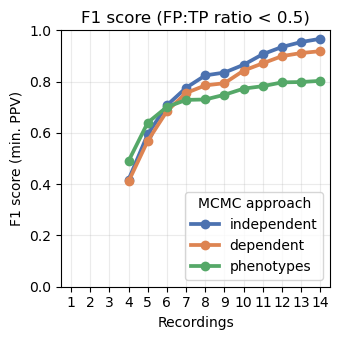

In [ ]:
# PLOT

# select data:
names = [
    'Multi-feature - 1 night (Colapsed)',
    'Multi-feature - 2 nights',
    'Multi-feature - phenotypes',
    #'SOREMP - 2 nights',
    #'SOREMP - 1 night (Colapsed)',
    #'SOREMP - 1 night',
    #'Multi-feature - 1 night',
    
    #'MSLT - 2 night'
]

x = 'Recordings (n)'
cols = 'Prevalence'
rows = 'min PPV'
# y = 'F1 score'
y = 'F1 score (min. PPV)'
#y = 'Sensitivity'
hue = 'name'
prevalence = '1:2048'

# plot
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(3.5, 3.5))

# # select data:
df_ = df_selected[
     (df_selected['Prevalence'] == prevalence) & 
     (df_selected['min PPV'] == min_precision)
]

# rename
names_new = ['independent', 'dependent', 'phenotypes']
renames = {
    'Multi-feature - 1 night (Colapsed)': 'independent',
    'Multi-feature - 2 nights': 'dependent',
    'Multi-feature - phenotypes': 'phenotypes',
}
df_['name'] = df_['name'].replace(renames)


# plot
sns.pointplot(df_, x=x, y=y, hue=hue, ax=ax, palette='deep', ms=5, hue_order=names_new)

# set titles and labels
ax.set_title(f'F1 score (FP:TP ratio < {max_FPTP})')
ax.set_ylabel(y)
ax.set_xlabel('Recordings')
ax.set_ylim([0, 1])

ax.grid(True, alpha=0.25)
# remove legends to avoid duplication
ax.legend().remove()
ax.legend(title='MCMC approach', loc='lower right')

plt.tight_layout()


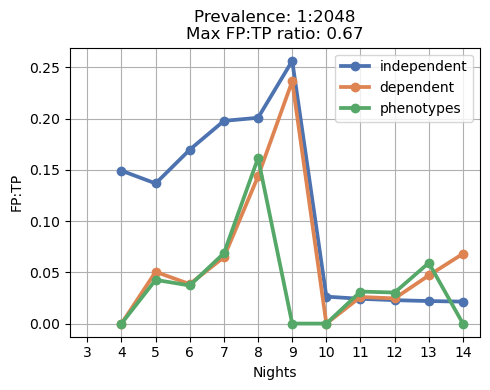

In [21]:
# PLOT

# select data:
names = [
    'Multi-feature - 1 night', 
    'Multi-feature - 2 nights',
    #'SOREMP - 2 nights', 
    #'SOREMP - 1 night', 
    #'PSG-based - 1 night - Stanford test',
    #'Multi-feature - 1 night - Stanford test', 
    'Multi-feature - phenotypes'
]

x = 'Recordings (n)'
cols = 'Prevalence'
rows = 'min PPV'
#y = 'F1 score'
y = 'FP:TP'
hue = 'name'

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 4))

# select data:

# plot
sns.pointplot(df_selected, x=x, y=y, hue=hue, hue_order=names_new, ax=ax, palette='deep', ms=5)

# set titles and labels
ax.set_title(f"Prevalence: {prevalence}\nMax FP:TP ratio: {min_precision:.2f}")
ax.set_ylabel(y)
ax.set_xlabel('Nights')
ax.grid(True)

# remove legends to avoid duplication
#ax.legend().remove()
ax.legend(title='', loc='upper right', fontsize=10)

# ax.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()